In [2]:
# Task 2.1: Download dataset and create filtered dataframe

import gdown
import pandas as pd

# Download the dataset
file_id = "12u_T3ZSRkKwHM8msfDe9OdEmhZmvT6Eo"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "Au_nanoparticle_dataset.csv", quiet=False)

# Load the dataset
df = pd.read_csv("Au_nanoparticle_dataset.csv")

# Create new dataframe with only specified columns
new_df = df[['N_total', 'N_bulk', 'N_surface', 'R_avg']]

print(f"Original dataset shape: {df.shape}")
print(f"Filtered dataset shape: {new_df.shape}")
print(f"Selected columns: {new_df.columns.tolist()}")

Downloading...
From: https://drive.google.com/uc?id=12u_T3ZSRkKwHM8msfDe9OdEmhZmvT6Eo
To: /content/Au_nanoparticle_dataset.csv
100%|██████████| 2.43M/2.43M [00:00<00:00, 76.7MB/s]

Original dataset shape: (4000, 185)
Filtered dataset shape: (4000, 4)
Selected columns: ['N_total', 'N_bulk', 'N_surface', 'R_avg']


In [3]:
print("First 20 samples of the dataframe:")
print(new_df.head(20))

First 20 samples of the dataframe:
    N_total  N_bulk  N_surface    R_avg
0      1599    1014        585  17.3706
1      1642    1034        608  17.6061
2      4637    3365       1272  25.3692
3      7189    5292       1897  29.7011
4     11004    8508       2496  34.2831
5     13375   10768       2607  36.6334
6     13795   11155       2640  37.0108
7     13947   11304       2643  37.1672
8     14020   11357       2663  37.2103
9     14056   11389       2667  37.2467
10     1534     966        568  17.1107
11     1559     974        585  17.2101
12     4356    3099       1257  24.8253
13     6550    4675       1875  29.0376
14    10175    7748       2427  33.4399
15    12393    9842       2551  35.6950
16    13207   10590       2617  36.4657
17    13543   10937       2606  36.7871
18    13713   11079       2634  36.9333
19    13791   11151       2640  37.0104


In [4]:
# Task 2.3: Calculate mean, standard deviation and quartile values

# Calculate mean
print("Mean values:")
print(new_df.mean())

# Calculate standard deviation
print("\nStandard deviation:")
print(new_df.std())

# Calculate quartile values (includes min, 25%, 50%, 75%, max)
print("\nQuartile values:")
print(new_df.describe())

Mean values:
N_total      3476.786500
N_bulk       2521.550250
N_surface     955.236250
R_avg          20.654363
dtype: float64

Standard deviation:
N_total      3679.286769
N_bulk       2976.232459
N_surface     721.870220
R_avg           7.610716
dtype: float64

Quartile values:
            N_total        N_bulk   N_surface        R_avg
count   4000.000000   4000.000000  4000.00000  4000.000000
mean    3476.786500   2521.550250   955.23625    20.654363
std     3679.286769   2976.232459   721.87022     7.610716
min      236.000000     89.000000   137.00000     8.528600
25%     1061.000000    618.750000   437.00000    15.160725
50%     1867.000000   1199.000000   666.00000    18.629250
75%     4503.000000   3183.000000  1301.75000    25.525125
max    14277.000000  11580.000000  3190.00000    39.239200


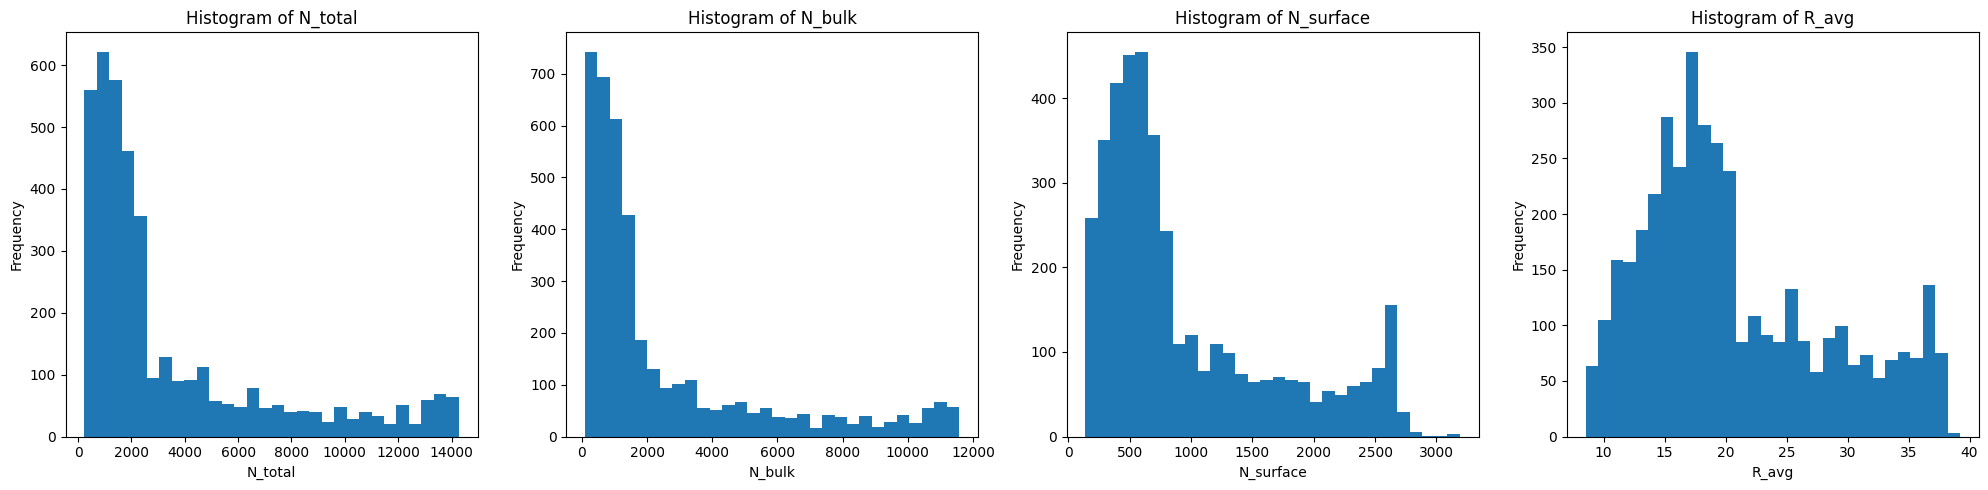

In [5]:
# Task 2.4: Plot histograms in 1x4 layout

import matplotlib.pyplot as plt

# Create 1x4 subplot layout
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
features = ['N_total', 'N_bulk', 'N_surface', 'R_avg']

# Plot histogram for each feature
for i, feature in enumerate(features):
    axes[i].hist(new_df[feature], bins=30)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

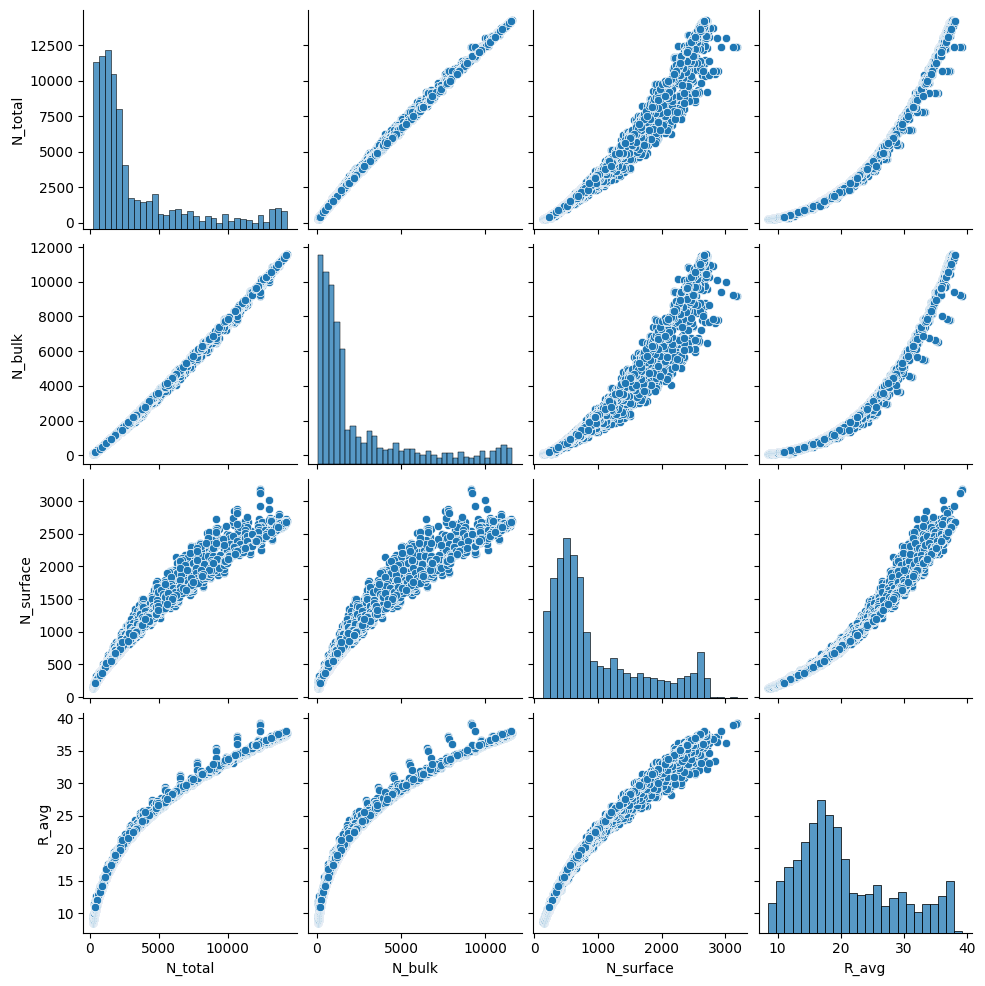

In [6]:
# Task 2.5: Pairplot visualization

import seaborn as sns

# Create pairplot
sns.pairplot(new_df)
plt.show()

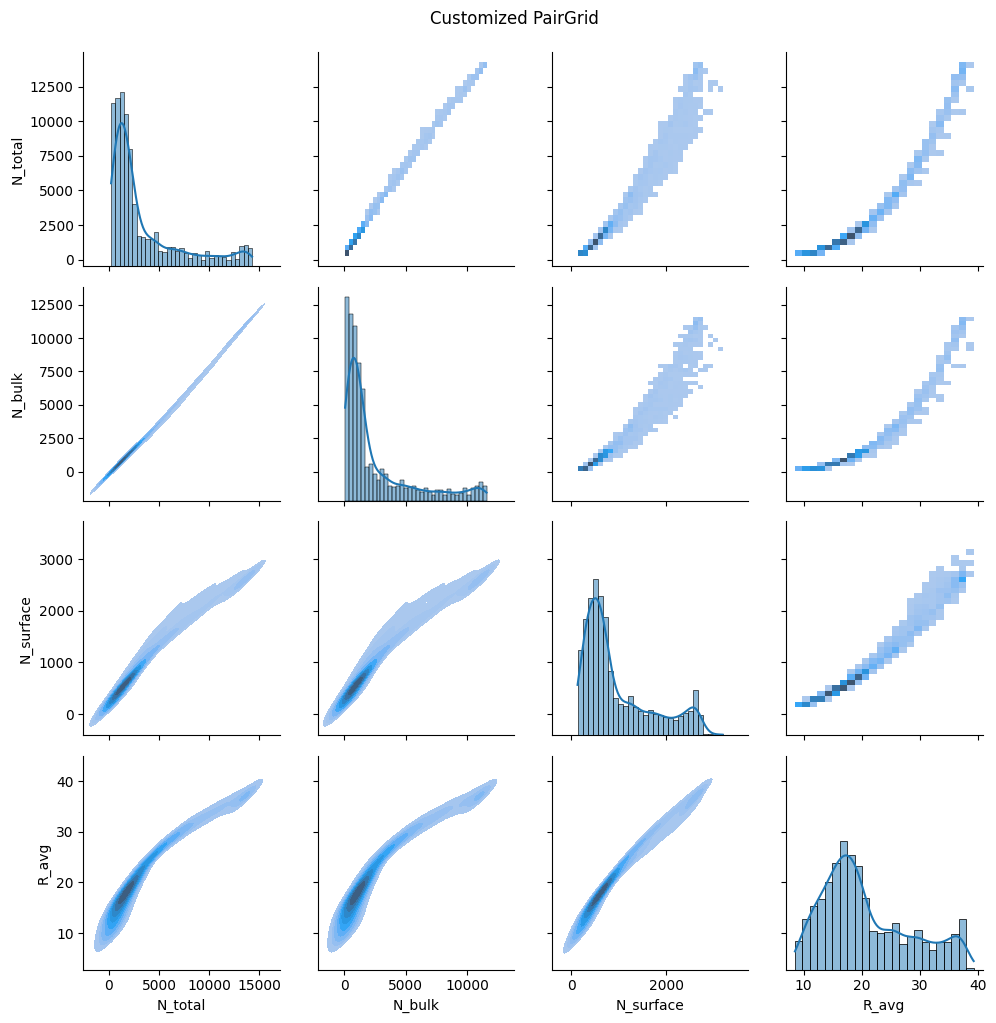

In [9]:
# Task 2.6:

import seaborn as sns
import matplotlib.pyplot as plt

g = sns.PairGrid(new_df)
g.map_upper(sns.histplot)              # Upper triangle: bivariate hist
g.map_diag(sns.histplot, kde=True)     # Diagonal: hist + KDE
g.map_lower(sns.kdeplot, fill=True)    # Lower triangle: bivariate KDE
plt.suptitle("Customized PairGrid", y=1.02)
plt.show()